In [14]:
import numpy as np
import random
csize = int(input("Enter chromosome size: "))
print(csize) 
k = int(input("Enter k-mer's k size: "))
print(k)
seq = "".join(random.choice("AGCT") for _ in range(csize))
seq

Enter chromosome size: 15
15
Enter k-mer's k size: 7
7


'GAAGTCGCCTTCAGG'

In [15]:
def kmerfind(seq,k):
    kmerList = []
    for i in range(0,len(seq)-k+1):
        
        kmer=seq[i:i+k]
        kmerList.append(kmer)
    print("Splitting the sequence into " + str(k) + " - mers")
    print(kmerList)
    print("============================================")
    return kmerList

In [16]:
def kmersort(kmerList):
    x=kmerList.copy()
    l = len(x)
    for i in range(l-1):
        for j in range(l-i-1):
            if x[j]>x[j+1]:
                x[j],x[j+1]=x[j+1],x[j]
    print(str(k) + " - mers arranged in lexicographic order")
    print(x)
    print("============================================")
    return x             
                
                
        

In [17]:
kmerList=kmerfind(seq,k)
Kmers=kmersort(kmerList)

Splitting the sequence into 7 - mers
['GAAGTCG', 'AAGTCGC', 'AGTCGCC', 'GTCGCCT', 'TCGCCTT', 'CGCCTTC', 'GCCTTCA', 'CCTTCAG', 'CTTCAGG']
7 - mers arranged in lexicographic order
['AAGTCGC', 'AGTCGCC', 'CCTTCAG', 'CGCCTTC', 'CTTCAGG', 'GAAGTCG', 'GCCTTCA', 'GTCGCCT', 'TCGCCTT']


In [18]:
ikmer = Kmers.index(kmerList[0])
ikmer

5

In [19]:
def hammingDist(str1, str2):
    i = 0
    count = 0
 
    while(i < len(str1)):
        if(str1[i] != str2[i]):
            count += 1
        i += 1
    return count

In [20]:
dist=np.zeros([len(Kmers),len(Kmers)])
for n in range(len(Kmers)):
    for p in range(len(Kmers)):
        dist[n][p]=hammingDist(Kmers[n],Kmers[p])
print(dist)        
        

[[0. 5. 5. 6. 6. 6. 6. 6. 5.]
 [5. 0. 6. 4. 5. 6. 6. 6. 6.]
 [5. 6. 0. 6. 4. 6. 5. 6. 5.]
 [6. 4. 6. 0. 5. 6. 5. 6. 5.]
 [6. 5. 4. 5. 0. 6. 7. 6. 6.]
 [6. 6. 6. 6. 6. 0. 4. 4. 7.]
 [6. 6. 5. 5. 7. 4. 0. 4. 6.]
 [6. 6. 6. 6. 6. 4. 4. 0. 5.]
 [5. 6. 5. 5. 6. 7. 6. 5. 0.]]


In [21]:
from mip import Model, xsum, minimize, BINARY
import time
from itertools import product
   
def TSP_ILP(G):
    
       
    start = time.time()
    V1 =  range(len(G))
    n, V = len(G), set(V1)
    model = Model()
    # binary variables indicating if arc (i,j) is used 
    # on the route or not
    x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
    # continuous variable to prevent subtours: each city will have a
    # different sequential id in the planned route except the 1st one
    y = [model.add_var() for i in V]
    # objective function: minimize the distance
    model.objective = minimize(xsum(G[i][j]*x[i][j] \
                               for i in V for j in V))
    
    # constraint : leave each city only once
    for i in V:
        model += xsum(x[i][j] for j in V - {i}) == 1
    # constraint : enter each city only once
    for i in V:
        model += xsum(x[j][i] for j in V - {i}) == 1
    # subtour elimination
    for (i, j) in product(V - {0}, V - {0}):
        if i != j:
            model += y[i] - (n+1)*x[i][j] >= y[j]-n
    # optimizing
    model.optimize()
    # checking if a solution was found
    if model.num_solutions:
        print('Total distance {}'.format(model.objective_value))
        nc = ikmer # cycle starts from vertex 0
        cycle = [nc]
        while True:
            nc = [i for i in V if x[nc][i].x >= 0.99][0]
            cycle.append(nc)
            if nc == 0:
                break

    return ( cycle)

In [22]:
path=TSP_ILP(dist)
path.pop()
print(path)

Total distance 41.0
[5, 7, 8]


# CHALLENGES

In [23]:
def reconstruct(path,Kmers):
    fin = Kmers[path[0]]
    for i in range(1,len(path)):
        fin+=Kmers[path[i]][k-2]
    print(fin)   
    return fin
   
    

In [24]:
recons=(reconstruct(path,Kmers))  

    

GAAGTCGCT


In [25]:
edges = []
nodes = set()
for i in range(len(path)-1):
    ind1=path[i]
    ind2=path[i+1]
    edges.append((Kmers[ind1],Kmers[ind2]))
    nodes.add(Kmers[ind1])
    nodes.add(Kmers[ind2])
nodes_list = list(nodes)
print("Nodes of sequence " + recons)
print(nodes_list)
print("============================================")
print("Edges of sequence " + recons)
print(edges)
print("============================================")     



Nodes of sequence GAAGTCGCT
['GTCGCCT', 'TCGCCTT', 'GAAGTCG']
Edges of sequence GAAGTCGCT
[('GAAGTCG', 'GTCGCCT'), ('GTCGCCT', 'TCGCCTT')]


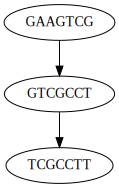

In [26]:
from graphviz import Digraph
dot = Digraph()
for i in range (len(nodes_list)):
    dot.node(nodes_list[i])
dot.edges(edges)
# Visualize the graph
dot